In [1]:
# SIMPLE LINEAR REGRESSION
# We want to create a model describing the relation between minutes spent on the web-site and number of friends
# we already understood there is a strong linear relationship, let's start with that

# Yi = bXi + a + Ei
# Yi is the number of minutes user i spends on the site daily
# Xi is the number of friends user i has and E is a error term
# b and a are constants
from IPython.display import clear_output
from importnb import Notebook
la = Notebook.load("4 linear_algebra.ipynb")
st = Notebook.load("5 statistics.ipynb")
gd = Notebook.load("8 gradient descent.ipynb")
clear_output()
from typing import Tuple

def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

# since we know the yi and xi we can compute the error for each pair
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

def sum_of_sqerrors(alpha: float, beta: float, x: la.Vector, y: la.Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

# The least squares solution is to choose the alpha and beta that make sum_of_sqerrors as small as possible.
def least_squares_fit(x: la.Vector, y: la.Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = st.correlation(x, y) * st.standard_deviation(y) / st.standard_deviation(x)
    alpha = st.mean(y) - beta * st.mean(x)
    return alpha, beta

# let's do a quick test
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

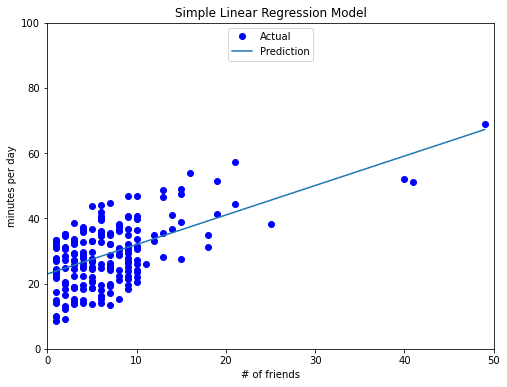

In [2]:
alpha, beta = least_squares_fit(st.num_friends_good, st.daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

import matplotlib.pyplot as plt
# let's see how it looks like
plt.figure(figsize=(8, 6))
plt.title("Simple Linear Regression Model")
plt.plot(st.num_friends_good, st.daily_minutes_good, 'bo', label='Actual')       # red  x
xTest = [i for i in range(0, 50)]
yPred = [predict(alpha, beta, x) for x in xTest]
plt.plot(xTest, yPred, label='Prediction')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.xlim([0, 50])
plt.ylim([0, 100])
plt.legend(loc=9)
plt.show()

In [3]:
# we need to measure the how good the model is fitting the data. A common measure is coefficient of determination (or R-squared)
def total_sum_of_squares(y: la.Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in st.de_mean(y))
    
def r_squared(alpha: float, beta: float, x: la.Vector, y: la.Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))
# our prediction should be at least better then alpha = mean(y) and beta = 0
rsq = r_squared(alpha, beta, st.num_friends_good, st.daily_minutes_good)
assert 0.328 < rsq < 0.330 # the higher it is the better the model is

print("r-squared", r_squared(alpha, beta, st.num_friends_good, st.daily_minutes_good))

r-squared 0.3291078377836305


In [4]:
# we can try to do the same, using gradient descent
import random
import tqdm
num_epochs = 10000
random.seed(0)
guess = [random.random(), random.random()]  # choose random value to start
learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess
        # Partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                     for x_i, y_i in zip(st.num_friends_good,
                                         st.daily_minutes_good))
        # Partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                     for x_i, y_i in zip(st.num_friends_good,
                                         st.daily_minutes_good))
        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta,
                               st.num_friends_good, st.daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")
        # Finally, update the guess
        guess = gd.gradient_step(guess, [grad_a, grad_b], -learning_rate)

# We should get pretty much the same results:
alpha, beta = guess
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

loss: 13196.619: 100%|██████████| 10000/10000 [00:21<00:00, 455.04it/s]
